In [1]:
import pandas as pd
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
import pandas as pd
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from io import BytesIO
from PIL import Image
import numpy as np

In [3]:
wandb.init(project="Question Type", id='9diy6mi0', resume="must")

In [4]:
result = pd.read_csv('predictions.csv')

In [5]:
idx_to_ans_type = {0: 'yes/no', 1: 'action', 2: 'object', 3: 'location', 4: 'other', 5: 'color', 6: 'human', 7: 'number'}

In [6]:
result

       question id  target  prediction
0            53983       5           5
1           108616       7           4
2           147680       0           0
3            76757       2           2
4           130783       4           5
...            ...     ...         ...
18469       106745       0           0
18470        37605       1           1
18471       129558       0           0
18472       105698       5           5
18473        24644       0           0

[18474 rows x 3 columns]

In [7]:
result['target'] = result['target'].map(idx_to_ans_type)
result['prediction'] = result['prediction'].map(idx_to_ans_type)

In [8]:
result['prediction']

0         color
1         other
2        yes/no
3        object
4         color
          ...  
18469    yes/no
18470    action
18471    yes/no
18472     color
18473    yes/no
Name: prediction, Length: 18474, dtype: object

In [9]:
result.to_csv("predictions.csv")

In [10]:
wandb.save("predictions.csv")

['/home/ndhuynh/github/Question-Analysis/wandb/run-20240118_134105-9diy6mi0/files/predictions.csv']

In [11]:
test_result = result

In [12]:
y_true = test_result['target']
y_pred = test_result['prediction']
conf_matrix = confusion_matrix(y_true, y_pred, labels=y_true.unique())

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Set up the matplotlib figure for side-by-side plots
plt.figure(figsize=(30, 12))

# Regular confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=y_true.unique(), yticklabels=y_true.unique(), 
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Type')
plt.ylabel('True Type')

# Normalized confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', 
            xticklabels=y_true.unique(), yticklabels=y_true.unique(), 
            cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Type')
plt.ylabel('True Type')

# Main title

# Save the plot to a buffer
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
image = Image.open(buffer)
image_array = np.array(image)

# Log the image to wandb
wandb.log({"Confusion Matrix (3 types)": wandb.Image(image_array)})

# Close the plot
plt.close()

In [13]:
wandb.finish()

In [14]:
y_true = test_result['target']
y_pred = test_result['prediction']
conf_matrix = confusion_matrix(y_true, y_pred, labels=y_true.unique())

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Set up the matplotlib figure for side-by-side plots
plt.figure(figsize=(30, 12))

# Regular confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=y_true.unique(), yticklabels=y_true.unique(), 
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Type')
plt.ylabel('True Type')

# Normalized confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', 
            xticklabels=y_true.unique(), yticklabels=y_true.unique(), 
            cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Type')
plt.ylabel('True Type')

# Main title

# Save the plot to a buffer
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
image = Image.open(buffer)
image_array = np.array(image)

# Log the image to wandb
# wandb.log({"Confusion Matrix (3 types)": wandb.Image(image_array)})

# Close the plot
plt.show()

In [15]:
import pandas as pd
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from io import BytesIO
from PIL import Image
import numpy as np

In [16]:
wandb.init(project="Question Type", id='yfwmljbg', resume="must")

In [17]:
result = pd.read_csv('predictions_BiLSTM+Glove.csv')

In [18]:
idx_to_ans_type = {0: 'yes/no', 1: 'action', 2: 'object', 3: 'location', 4: 'other', 5: 'color', 6: 'human', 7: 'number'}

In [19]:
result

       question id  target  prediction
0           152962       7           7
1            55486       5           5
2            74374       2           2
3           152885       5           5
4           117396       0           0
...            ...     ...         ...
18469       113695       2           2
18470         8832       7           7
18471        62147       5           5
18472       111284       0           0
18473        40714       2           2

[18474 rows x 3 columns]

In [20]:
result['target'] = result['target'].map(idx_to_ans_type)
result['prediction'] = result['prediction'].map(idx_to_ans_type)

In [21]:
result['prediction']

0        number
1         color
2        object
3         color
4        yes/no
          ...  
18469    object
18470    number
18471     color
18472    yes/no
18473    object
Name: prediction, Length: 18474, dtype: object

In [22]:
result.to_csv("predictions.csv")

In [23]:
result['target'] = result['target'].map(idx_to_ans_type)
result['prediction'] = result['prediction'].map(idx_to_ans_type)

In [24]:
result['prediction']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
18469    NaN
18470    NaN
18471    NaN
18472    NaN
18473    NaN
Name: prediction, Length: 18474, dtype: object

In [25]:
result.to_csv("predictions.csv")

In [26]:
result = pd.read_csv('predictions_BiLSTM+Glove.csv')

In [27]:
idx_to_ans_type = {0: 'yes/no', 1: 'action', 2: 'object', 3: 'location', 4: 'other', 5: 'color', 6: 'human', 7: 'number'}

In [28]:
result

       question id  target  prediction
0           152962       7           7
1            55486       5           5
2            74374       2           2
3           152885       5           5
4           117396       0           0
...            ...     ...         ...
18469       113695       2           2
18470         8832       7           7
18471        62147       5           5
18472       111284       0           0
18473        40714       2           2

[18474 rows x 3 columns]

In [29]:
result['target'] = result['target'].map(idx_to_ans_type)
result['prediction'] = result['prediction'].map(idx_to_ans_type)

In [30]:
result['prediction']

0        number
1         color
2        object
3         color
4        yes/no
          ...  
18469    object
18470    number
18471     color
18472    yes/no
18473    object
Name: prediction, Length: 18474, dtype: object

In [31]:
result.to_csv("predictions.csv")

In [32]:
wandb.save("predictions.csv")

['/home/ndhuynh/github/Question-Analysis/wandb/run-20240119_000110-yfwmljbg/files/predictions.csv']

In [33]:
test_result = result

In [34]:
y_true = test_result['target']
y_pred = test_result['prediction']
conf_matrix = confusion_matrix(y_true, y_pred, labels=y_true.unique())

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Set up the matplotlib figure for side-by-side plots
plt.figure(figsize=(30, 12))

# Regular confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=y_true.unique(), yticklabels=y_true.unique(), 
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Type')
plt.ylabel('True Type')

# Normalized confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', 
            xticklabels=y_true.unique(), yticklabels=y_true.unique(), 
            cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Type')
plt.ylabel('True Type')

# Main title

# Save the plot to a buffer
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
image = Image.open(buffer)
image_array = np.array(image)
wandb.log({"Confusion Matrix (3 types)": wandb.Image(image_array)})

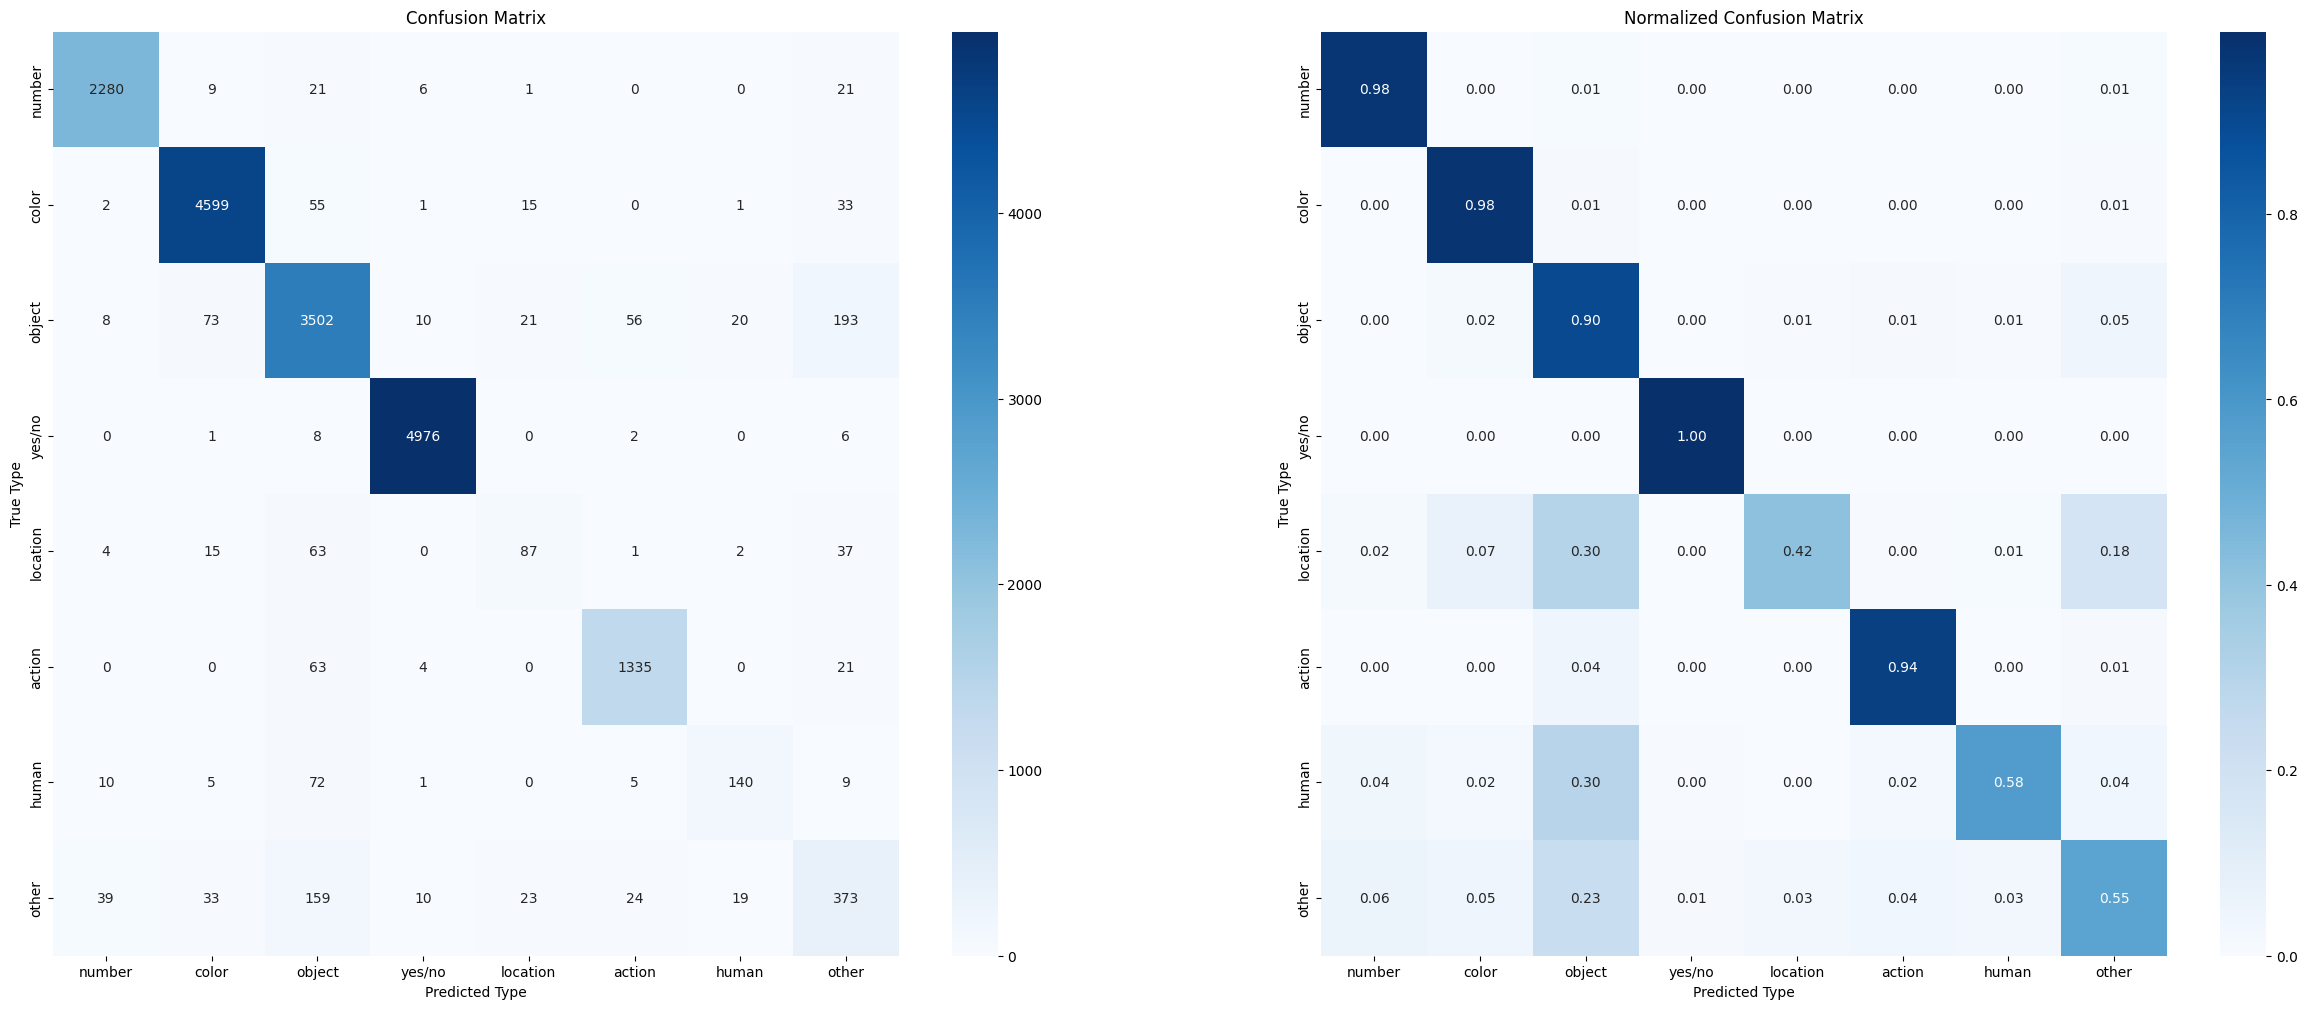

In [35]:
wandb.finish()